# On the computation of $\pi$

## Asking the maths library

My computer tells me that $\pi$ is *approximatively*

In [1]:
from math import *
print(pi)

3.141592653589793


## Buffon's needle
Applying the method of [Buffon's needle](https://en.wikipedia.org/wiki/Buffon%27s_needle_problem), we get the __approximation__

In [2]:
import numpy as np
np.random.seed(seed=42)
N = 10000
x = np.random.uniform(size=N, low=0, high=1)
theta = np.random.uniform(size=N, low=0, high=pi/2)
2/(sum((x+np.sin(theta))>1)/N)

3.128911138923655

## Using a surface fraction argument
A method that is easier to understand and does not make use of the $\sin$ function is based on the fact that if $X\sim U(0,1)$ and $Y\sim U(0,1)$, then $P[X^2+Y^2\leq 1] = \pi/4$ (see ["Monte Carlo method" on Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method)). The following code uses this approach:

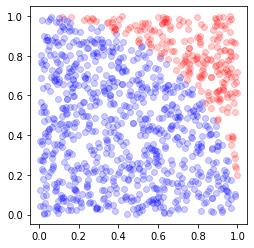

In [3]:
%matplotlib inline  
import matplotlib.pyplot as plt

np.random.seed(seed=42)
N = 1000
x = np.random.uniform(size=N, low=0, high=1)
y = np.random.uniform(size=N, low=0, high=1)

accept = (x*x+y*y) <= 1
reject = np.logical_not(accept)

fig, ax = plt.subplots(1)
ax.scatter(x[accept], y[accept], c='b', alpha=0.2, edgecolor=None)
ax.scatter(x[reject], y[reject], c='r', alpha=0.2, edgecolor=None)
ax.set_aspect('equal')

It is then straightforward to obtain a (not really good) approximation to $\pi$ by counting how many times, on average, $X^2 + Y^2$ is smaller than 1:

In [4]:
4*np.mean(accept)

3.112